In [209]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [210]:
data=pd.read_csv("layoffs.csv")

In [211]:
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Ola,Bengaluru,Transportation,200.0,NaN,2023-01-13,Series J,India,5000.0
1,Lending Club,SF Bay Area,Finance,225.0,0.14,2023-01-12,IPO,United States,392.0
2,SmartNews,Tokyo,Media,120.0,0.13,2023-01-12,Series F,United States,410.0
3,Pier,Sao Paulo,Finance,111.0,0.39,2023-01-12,Series B,Brazil,42.0
4,Blockchain.com,London,Crypto,110.0,0.28,2023-01-12,Series D,United Kingdom,490.0


In [212]:
data.tail()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1941,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1942,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1943,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1944,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0
1945,Homebound,SF Bay Area,Real Estate,NaN,NaN,NaN,Unknown,United States,128.0


In [213]:
data.shape

(1946, 9)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 9 columns):
company                1946 non-null object
location               1946 non-null object
industry               1946 non-null object
total_laid_off         1350 non-null float64
percentage_laid_off    1315 non-null float64
date                   1945 non-null object
stage                  1942 non-null object
country                1946 non-null object
funds_raised           1796 non-null float64
dtypes: float64(3), object(6)
memory usage: 137.0+ KB


In [215]:
data.describe(include='all')

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
count,1946,1946,1946,1350.000000,1315.000000,1945,1942,1946,1796.000000
unique,1601,167,29,NaN,NaN,435,16,56,NaN
top,Loft,SF Bay Area,Finance,NaN,NaN,2020-04-02,Unknown,United States,NaN
freq,5,515,243,NaN,NaN,27,325,1283,NaN
mean,NaN,NaN,NaN,202.960741,0.268089,NaN,NaN,NaN,842.108739
std,NaN,NaN,NaN,620.859658,0.260117,NaN,NaN,NaN,6060.030270
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,34.000000,0.100000,NaN,NaN,NaN,46.000000
50%,NaN,NaN,NaN,70.000000,0.180000,NaN,NaN,NaN,145.000000
75%,NaN,NaN,NaN,150.000000,0.300000,NaN,NaN,NaN,409.000000


In [216]:
data.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

# # Data Cleaning and Preparing

In [217]:
data[data.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1088,Cazoo,London,Transportation,750.0,0.15,2022-06-07,IPO,United Kingdom,2000.0


In [218]:
data.drop_duplicates()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Ola,Bengaluru,Transportation,200.0,NaN,2023-01-13,Series J,India,5000.0
1,Lending Club,SF Bay Area,Finance,225.0,0.14,2023-01-12,IPO,United States,392.0
2,SmartNews,Tokyo,Media,120.0,0.13,2023-01-12,Series F,United States,410.0
3,Pier,Sao Paulo,Finance,111.0,0.39,2023-01-12,Series B,Brazil,42.0
4,Blockchain.com,London,Crypto,110.0,0.28,2023-01-12,Series D,United Kingdom,490.0
...,...,...,...,...,...,...,...,...,...
1941,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1942,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1943,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1944,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [219]:
data.isnull().sum()

company                  0
location                 0
industry                 0
total_laid_off         596
percentage_laid_off    631
date                     1
stage                    4
country                  0
funds_raised           150
dtype: int64

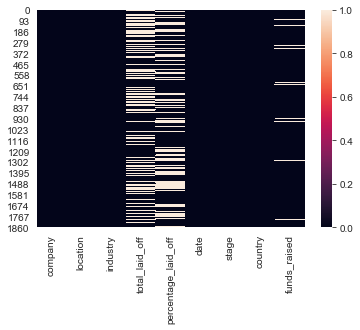

In [220]:
sns.heatmap(data.isnull())

In [221]:
data['total_laid_off']=data['total_laid_off'].fillna(0)
data['percentage_laid_off']=data['percentage_laid_off'].fillna(0)
data['date']=data['date'].fillna(0)
data['stage']=data['stage'].fillna(0)
data['funds_raised']=data['funds_raised'].fillna(0)

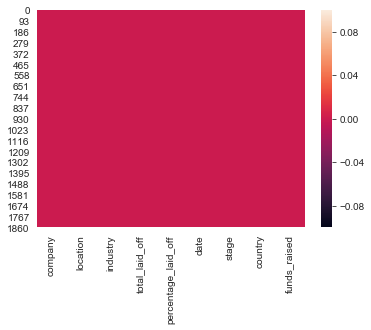

In [222]:
sns.heatmap(data.isnull())

In [223]:
#changing data type 

In [224]:
data['date'] = pd.to_datetime(data['date'])
data['total_laid_off'].astype(int)
data['funds_raised'].astype(int)
data['Year'] = data['date'].dt.year

# EDA

# #Layoff

In [225]:
#layoff by Year

In [226]:
data[data.Year==1970]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Year
1945,Homebound,SF Bay Area,Real Estate,0.0,0.0,1970-01-01,Unknown,United States,128.0,1970


In [227]:
data.drop([1945],inplace=True)

In [228]:
data['Year'].value_counts()

2022    1185
2020     633
2023      84
2021      43
Name: Year, dtype: int64

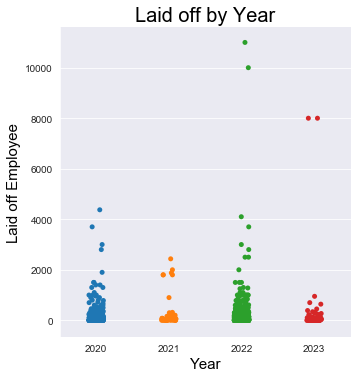

In [229]:
sns.catplot(x='Year', y='total_laid_off', data=data)
plt.title("Laid off by Year",size=20,color='black')
plt.xlabel("Year",size=15,color='black')
plt.ylabel("Laid off Employee",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

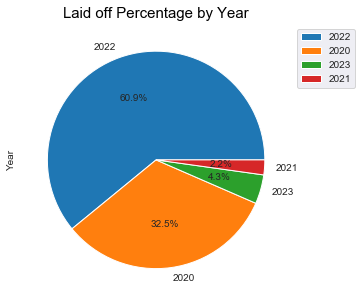

In [230]:
data['Year'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))
plt.title("Laid off Percentage by Year",size=15,color='black')
plt.legend(bbox_to_anchor=(1,1),loc=2)
sns.set_style('darkgrid')
plt.show()

In [231]:
 #layoff by Company

In [232]:
data['company'].value_counts()

Loft              5
OYO               5
Uber              5
Blend             4
Swiggy            4
                 ..
Playdots          1
NS8               1
Canoo             1
Highsnobiety      1
Dynamic Signal    1
Name: company, Length: 1600, dtype: int64

In [233]:
Top10=data.nlargest(10,['total_laid_off']).sort_values(by='total_laid_off',ascending = False )
Top10

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Year
355,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,IPO,United States,26000.0,2022
288,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0,2022
73,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,IPO,United States,108.0,2023
74,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04,IPO,United States,65.0,2023
1369,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30,Acquired,Netherlands,0.0,2020
289,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16,IPO,United States,2.0,2022
385,Twitter,SF Bay Area,Consumer,3700.0,0.50,2022-11-04,IPO,United States,12900.0,2022
1518,Uber,SF Bay Area,Transportation,3700.0,0.14,2020-05-06,IPO,United States,24700.0,2020
1247,Better.com,New York City,Real Estate,3000.0,0.33,2022-03-08,Unknown,United States,905.0,2022
1473,Uber,SF Bay Area,Transportation,3000.0,0.13,2020-05-18,IPO,United States,24700.0,2020


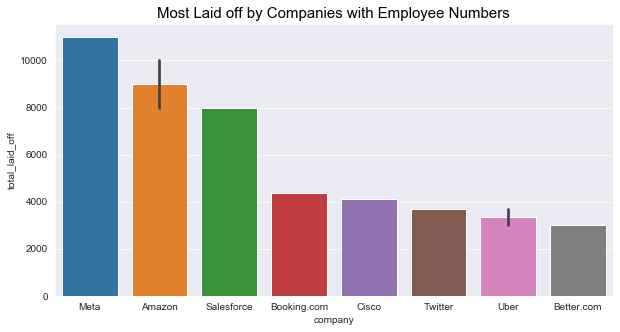

In [234]:
plt.figure(figsize=(10,5))
sns.barplot(x='company',y='total_laid_off',data=Top10)
plt.title("Most Laid off by Companies with Employee Numbers",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()

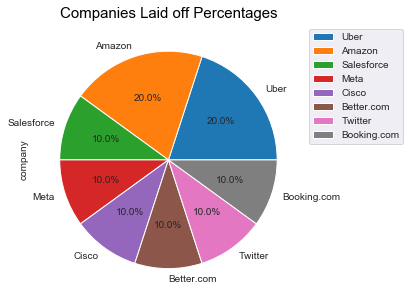

In [235]:
Top10['company'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))
plt.title("Companies Laid off Percentages",size=15,color='black')
plt.legend(bbox_to_anchor=(1,1),loc=2)
sns.set_style('darkgrid')
plt.show()

In [236]:
#layoff by Industry  

In [237]:
data['industry'].value_counts()

Finance           243
Retail            161
Healthcare        142
Transportation    121
Food              116
Marketing         116
Real Estate       106
Consumer           95
Other              88
Education          85
Crypto             82
Media              81
Data               66
Travel             63
Security           59
HR                 54
Infrastructure     38
Logistics          37
Support            30
Product            29
Sales              29
Recruiting         28
Fitness            28
Construction       14
Energy             11
Legal               9
Hardware            6
Aerospace           6
Manufacturing       2
Name: industry, dtype: int64

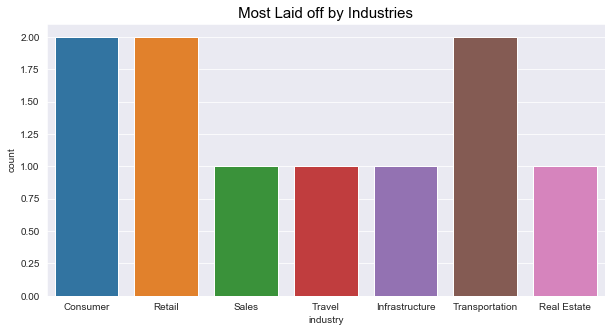

In [238]:
plt.figure(figsize=(10,5))
sns.countplot(x=Top10['industry'], data=Top10)
plt.title(" Most Laid off by Industries ",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()

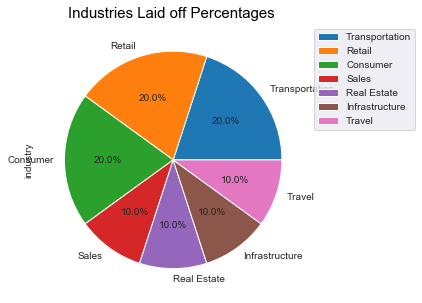

In [239]:
Top10['industry'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))
plt.title("Industries Laid off Percentages ",size=15,color='black')
plt.legend(bbox_to_anchor=(1,1),loc=2)
sns.set_style('darkgrid')
plt.show()

In [240]:
#layoffs by Country  

In [241]:
data['country'].value_counts()

United States           1282
India                    120
Canada                    86
United Kingdom            62
Brazil                    58
Germany                   54
Israel                    46
Australia                 39
Singapore                 30
Indonesia                 23
Sweden                    17
China                     15
Nigeria                   10
Kenya                      6
United Arab Emirates       6
Netherlands                6
Argentina                  5
Hong Kong                  5
Ireland                    4
Norway                     4
Mexico                     4
Denmark                    4
Estonia                    4
Seychelles                 4
Vietnam                    3
Pakistan                   3
Austria                    3
Colombia                   3
Luxembourg                 3
Malaysia                   3
Chile                      2
Romania                    2
France                     2
Portugal                   2
New Zealand   

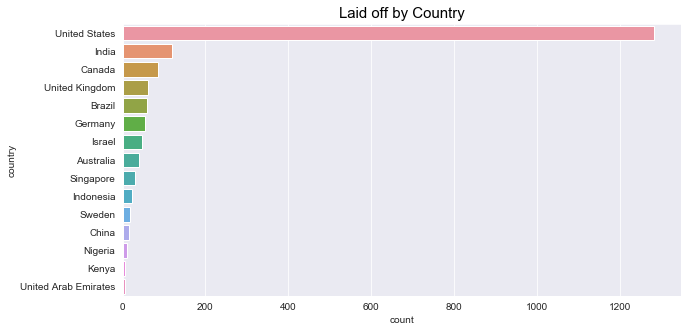

In [242]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="country", data=data, order=data['country'].value_counts().index[0:15])
plt.title("Laid off by Country",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

In [243]:
#layoffs by Location

In [244]:
data['location'].value_counts()

SF Bay Area      514
New York City    213
Boston            88
Los Angeles       81
Seattle           66
                ... 
Saskatoon          1
Moscow             1
Ahmedabad          1
Indianapolis       1
Trondheim          1
Name: location, Length: 167, dtype: int64

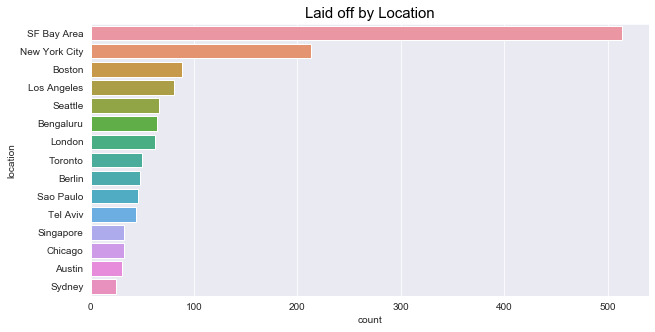

In [245]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="location", data=data, order=data['location'].value_counts().index[0:15])
plt.title("Laid off by Location",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

# Lay off in India

In [246]:
india = data[data['country']=="India"].sort_values(by='total_laid_off',ascending = False )
india

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Year
488,Byju's,Bengaluru,Education,2500.0,0.05,2022-10-12,Private Equity,India,5500.0,2022
1303,Bytedance,Mumbai,Consumer,1800.0,0.00,2021-01-27,Unknown,India,7400.0,2021
1311,WhiteHat Jr,Mumbai,Education,1800.0,0.00,2021-01-06,Acquired,India,11.0,2021
1416,PaisaBazaar,Gurugram,Finance,1500.0,0.50,2020-06-16,Series G,India,496.0,2020
1463,Ola,Bengaluru,Transportation,1400.0,0.35,2020-05-20,Series J,India,3800.0,2020
...,...,...,...,...,...,...,...,...,...,...
130,PharmEasy,Mumbai,Healthcare,0.0,0.00,2022-12-10,Unknown,India,1600.0,2022
1553,Flynote,Bengaluru,Travel,0.0,0.00,2020-05-01,Seed,India,1.0,2020
592,Lido Learning,Mumbai,Education,0.0,1.00,2022-09-09,Series C,India,20.0,2022
384,Practically,Hyderabad,Education,0.0,0.00,2022-11-06,Unknown,India,14.0,2022


In [247]:
Top10=india.nlargest(10,['total_laid_off'])[['company','industry','location','Year','total_laid_off','country']].set_index('country')
Top10

,company,industry,location,Year,total_laid_off
country,,,,,
India,Byju's,Education,Bengaluru,2022,2500.0
India,Bytedance,Consumer,Mumbai,2021,1800.0
India,WhiteHat Jr,Education,Mumbai,2021,1800.0
India,PaisaBazaar,Finance,Gurugram,2020,1500.0
India,Ola,Transportation,Bengaluru,2020,1400.0
India,Swiggy,Food,Bengaluru,2020,1100.0
India,Unacademy,Education,Bengaluru,2022,1000.0
India,Ola,Transportation,Bengaluru,2022,1000.0
India,Swiggy,Food,Bengaluru,2020,800.0


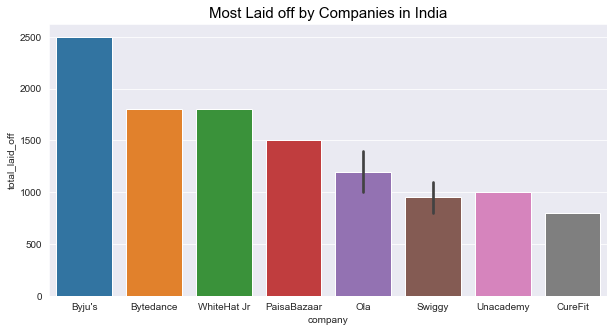

In [248]:
plt.figure(figsize=(10,5))
sns.barplot(x='company',y='total_laid_off',data=Top10)
plt.title("Most Laid off by Companies in India",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()

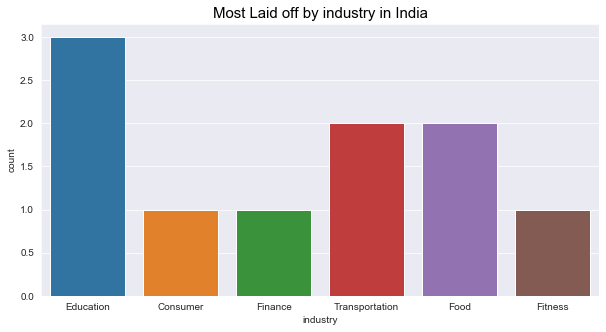

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(x=Top10['industry'], data=Top10)
plt.title("Most Laid off by industry in India",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()

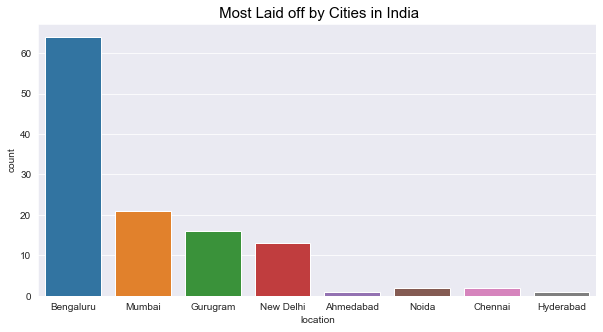

In [250]:
plt.figure(figsize=(10,5))
sns.countplot(x=india['location'], data=india)
plt.title(" Most Laid off by Cities in India",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()

# Fund Raised

In [251]:
#Fund Raised By Year

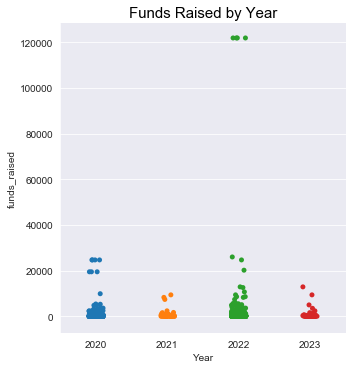

In [252]:
sns.catplot(x='Year', y='funds_raised', data=data)
plt.title("Funds Raised by Year",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

In [253]:
#Fund Raised By Company

In [254]:
Top=data.nlargest(10,['funds_raised'])[['company','funds_raised','Year']].set_index('Year')
Top

,company,funds_raised
Year,,
2022,Netflix,121900.0
2022,Netflix,121900.0
2022,Netflix,121900.0
2022,Netflix,121900.0
2022,Meta,26000.0
2022,Uber,24700.0
2020,Uber,24700.0
2020,Uber,24700.0
2020,Uber,24700.0


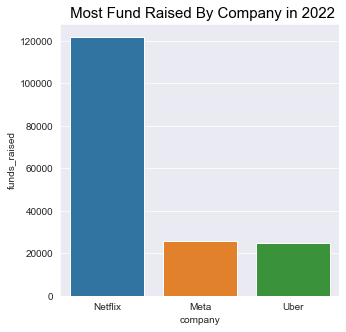

In [255]:
plt.figure(figsize=(5,5))
sns.barplot(x='company',y='funds_raised',data=Top)
plt.title(" Most Fund Raised By Company in 2022",color='black',size=15)
sns.set_style(style='darkgrid')
plt.show()